<a href="https://colab.research.google.com/github/Sahlakm/Phishing-Detection/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data0 = pd.read_csv('/gdrive/MyDrive/GRP 12: Project 2020-2024/Dataset/dataset_phishing.csv')
data0.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
print(data0.shape)
print(data0.columns)
data0.info()

(11430, 89)
Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistic

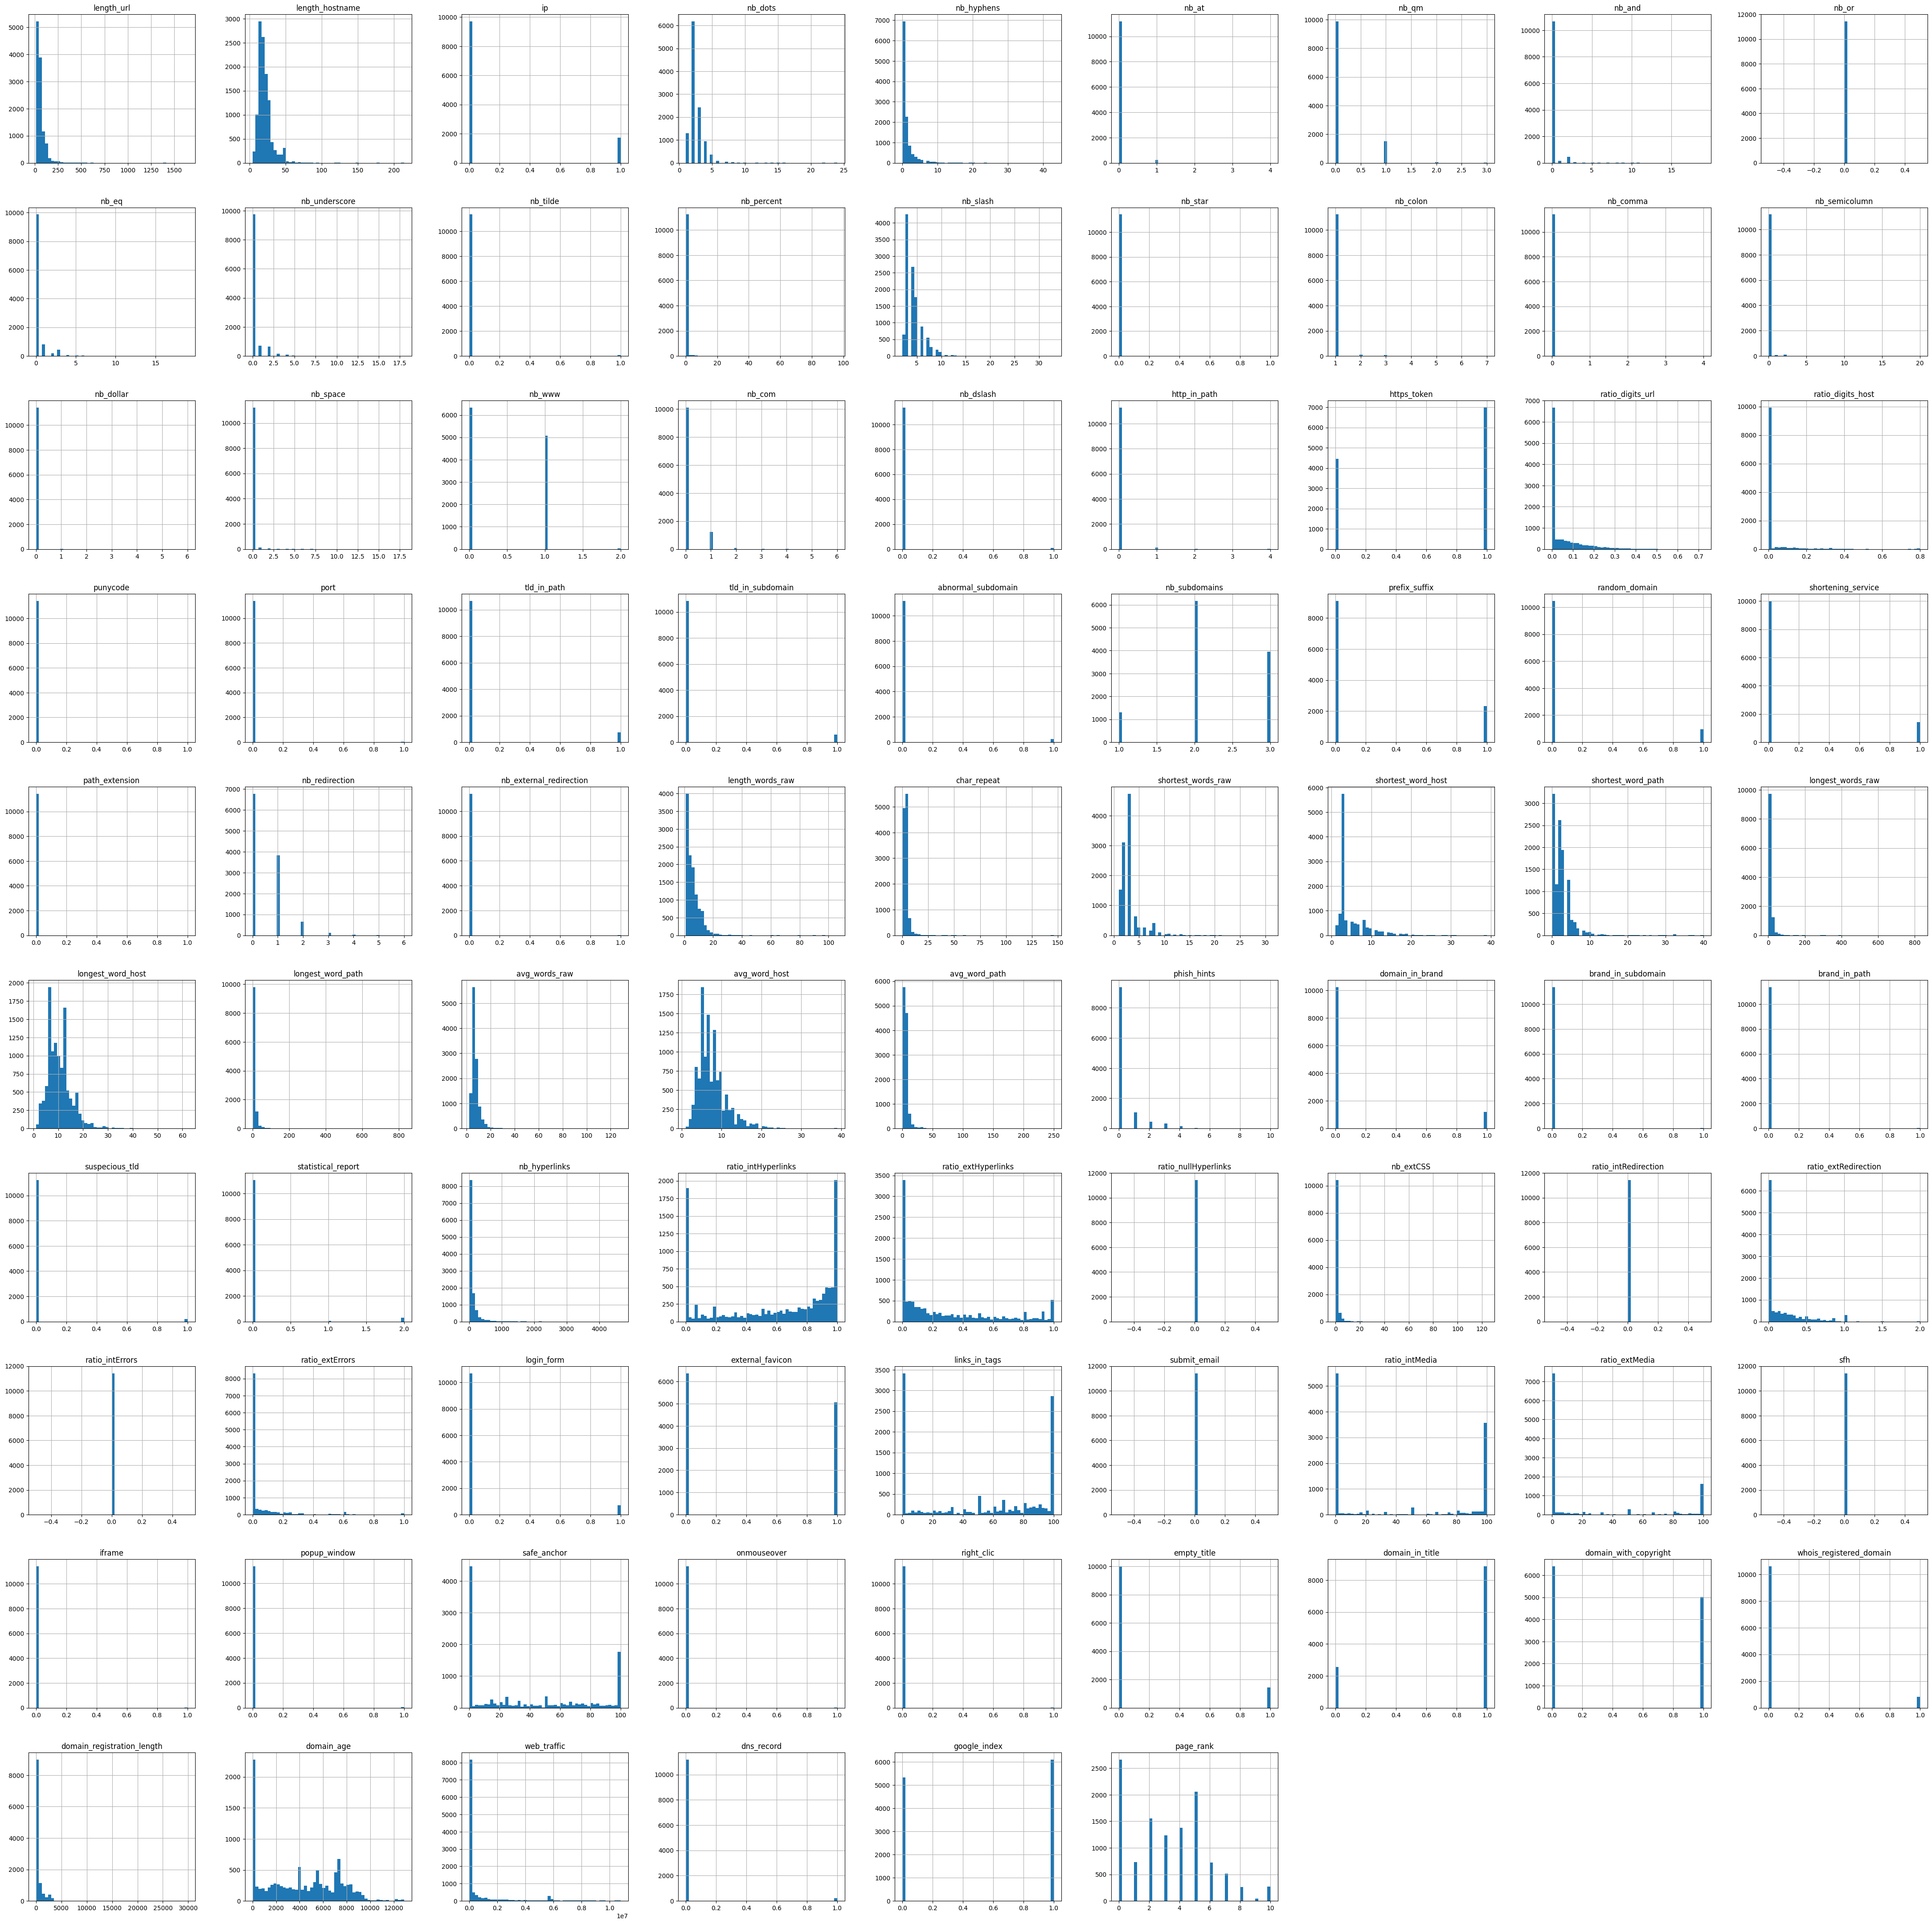

In [ ]:
data0.hist(bins = 50,figsize = (55,55))
plt.show()

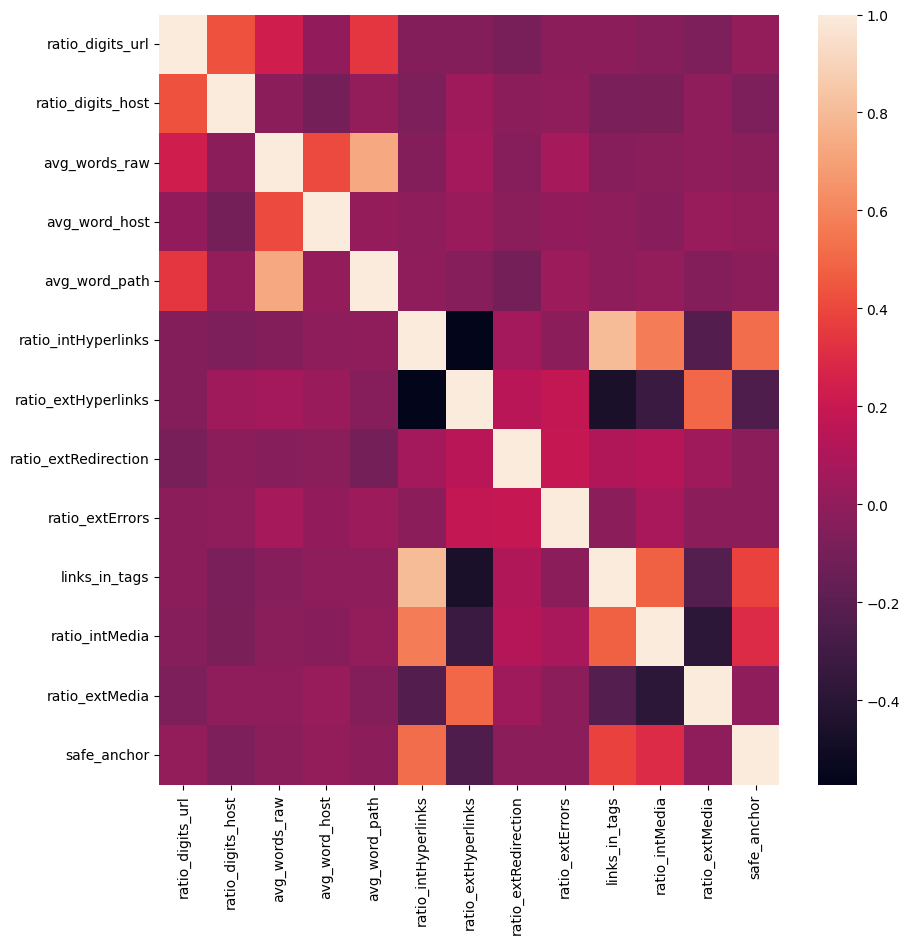

In [ ]:
plt.figure(figsize=(10,10))
selc = data0.select_dtypes(include="float64").columns
sns.heatmap(data0[selc].corr())
plt.show()

In [ ]:
data0.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [ ]:
data = data0.drop(['url'], axis = 1).copy()

In [ ]:
data.isnull().sum()

length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 88, dtype: int64

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,41,10,0,1,2,0,0,0,0,0,...,1,0,0,85,3567,0,0,1,0,phishing
1,39,19,0,3,0,0,0,0,0,0,...,1,0,0,3456,5309,37739,0,0,5,legitimate
2,96,14,1,3,0,0,0,0,0,0,...,1,0,0,327,1499,0,0,1,0,phishing
3,119,17,0,2,2,0,0,0,0,0,...,0,0,0,659,12126,1001,0,1,7,legitimate
4,54,13,0,2,1,0,0,0,0,0,...,0,1,0,1831,9227,767,0,1,6,legitimate


In [ ]:
data_ex=data.copy()

In [ ]:
data = data.drop(['whois_registered_domain','nb_colon','nb_comma','nb_semicolumn','nb_dollar','nb_com',
       'nb_dslash', 'nb_or','punycode', 'port','nb_tilde','popup_window','sfh', 'iframe','onmouseover', 'right_clic','brand_in_subdomain', 'brand_in_path','nb_external_redirection','random_domain', 'tld_in_path',
       'tld_in_subdomain','ratio_intErrors','ratio_intRedirection','ratio_intHyperlinks','statistical_report','suspecious_tld','login_form', 'submit_email','path_extension', ],axis=1).copy()

In [ ]:
y = data['status']
X = data.drop('status',axis=1)
X.shape, y.shape

((11430, 57), (11430,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                      test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((9144, 57), (2286, 57))

In [ ]:
from sklearn.metrics import accuracy_score

ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.948
Random forest: Accuracy on test Data: 0.946


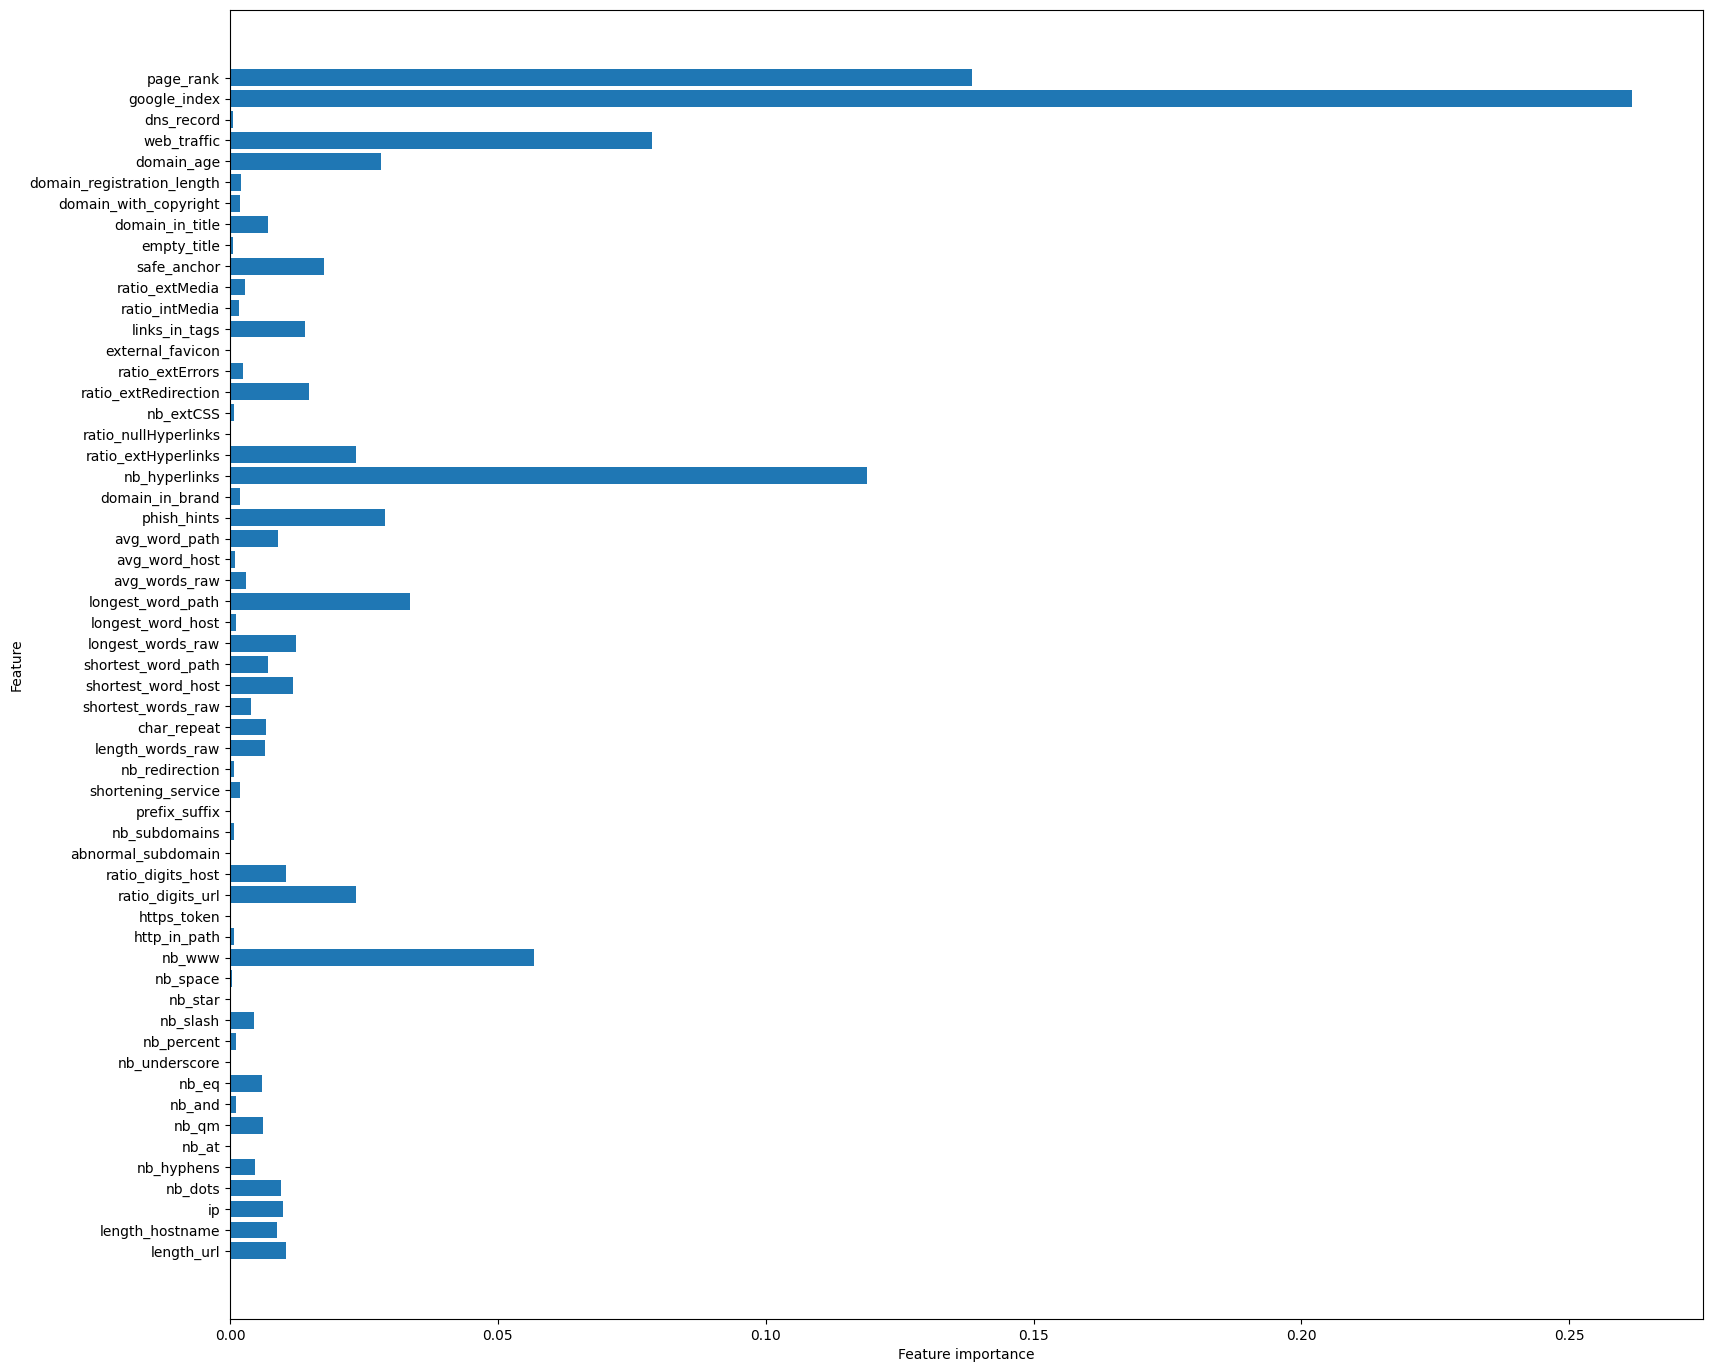

In [ ]:
plt.figure(figsize=(19,17))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
y1 = y.replace('legitimate', 0)
y1 = y1.replace('phishing', 1)
y.head()

0      phishing
1    legitimate
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1,
                                      test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((9144, 57), (2286, 57))

In [ ]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 0.970


In [ ]:
#storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

**Support Vector Machine**

In [ ]:
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.816
Multilayer Perceptrons: Accuracy on test Data: 0.811


In [ ]:
#storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [ ]:
#results = pd.DataFrame({ 'ML Model': ML_Model,
    #'Train Accuracy': acc_train,
    #'Test Accuracy': acc_test})
#results

In [ ]:
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
result = loaded_model.predict(1)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

/usr/local/lib/python3.10/dist-packages/xgboost/data.py:1037: UserWarning: Unknown data type: <class 'int'>, trying to convert it to csr_matrix
  warnings.warn(


ValueError: ignored